# Fun with numpy.random
Exploring numpy.random library as assignment for Programming for Data Analysis, GMIT 2019

Lecturer: dr Brian McGinley

>Author: **Andrzej Kocielski**  
>Github: [andkoc001](https://github.com/andkoc001/)  
>Email: G00376291@gmit.ie, and.koc001@gmail.com

Created: 11-10-2019

This Notebook should be read in conjunction with the corresponding README.md file at the assignment repository at GitHub: <https://github.com/andkoc001/fun-with-numpy-random/>.

___

## Introduction

NumPy (Numerical Python) is a library of external methods to Python, dedicated to numerical computing. One of its capabilities is pseudo-random number generator - a  random sampling package - `numpy.random`. The package can be divided into four sections (as per [NumPy documentation](https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.random.html)):
1. Simple random data,
2. Permutations,
3. Distributions,
4. Random generator.

Below we will take a closer look at each of these sections.

Note: In this Notebook terms 'function', 'method', 'routine' and 'subroutine' are used interchangeably.

### Setting up the scene

Importing numpy.random library and version check.

In [1]:
import numpy as np # NumPy package
import matplotlib.pyplot as plt # plotting engine
# below command will allow for the plots being displayed inside the Notebook, rather than in a separate screen.
%matplotlib inline

In [2]:
np.version.version # NumPy version check

'1.17.2'

A built-in help is available, accessible through the following commands:  
`dir()` prints out available functionalities of the parsed method  
`help()` shows doc-string of the parsed method

In [3]:
# dir(np.random) # commented out for clarity

In [4]:
# help(np.random.randint) # commented out for clarity

___
## NumPy and numpy.random

### What is NumPy?

Python programming language is acclaimed for its capacity of handling large amount of data in scientific community of different specialisation. One of the reasons behind it is the fact that Python is open source and its natural functionality can be extended by development of external libraries developed for specific purposes. NumPy is an example of such an extension.

NumPy is a package dedicated for numerical computing. It is particularly acclaimed for handling n-dimensional arrays.

Here is an excerpt from Wikipedia's entry on NumPy:
> NumPy (...) is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. - Wikipedia

### Overall purpose of random sampling routine in NumPy

NumPy comes with a large numbers of built-in functionalities, in the library documentation referred as to routines. Random sampling (numpy.random) is an example of such a routine (function).

The general purpose of the package is to generate n-dimensional array of pseudo-random numbers. As per entry on Geeks for Geeks [website](https://www.geeksforgeeks.org/random-sampling-in-numpy-random_sample-function/):
> numpy.random.random_sample() is one of the function for doing random sampling in numpy. It returns an array of specified shape and fills it with random floats in the half-open interval [0.0, 1.0). - Geeks for Geeks

The numpy.random package has a number typical applications. The most popular include:

- random number generation,
- choice from a list,
- creation of dummy data (e.g. for demonstration of some other functionalities),
- simulation of statistical distribution,
- hypothesis testing (assessment of how reasonable the observed data is, assuming a hypothesis is true),
- shuffling existing data (permutation - random reordering of entries in an array),
- simulation of uncertainty,
- simulation of noise.

Intriguingly, Python (pure) has a built-in function `random.random` function. Compared to `numpy.random`, however, there are some differences, according to an [reply](https://stackoverflow.com/a/7030595) on Stack Overflow:
> The `numpy.random` library contains a few extra probability distributions commonly used in scientific research, as well as a couple of convenience functions for generating arrays of random data. The `random.random` library is a little more lightweight, and should be fine if you're not doing scientific research or other kinds of work in statistics. - Stack Overflow


### Random sampling

It is important to mention here that the routine returns numbers that are not random in the true meaning of the word. The numbers are generated using the system's current time, and could be repeated when the routine is called under the same conditions. For that reasons, the generate numbers are referred as to **pseudo random**. It is not suitable for cryptography and security reasons. This concept will be discussed further in the notebook, in section concerning the _seed_.

The technique used by the numpy.random package is the popular Mersenne Twister pseudo-random number generator (PRNG) ([Wikipedia]
(https://en.wikipedia.org/wiki/Mersenne_Twister)).


___
## Simple random data

NumPy library comes with a large numbers of built-in functionalities, in the library documentation referred as to routines. Random sampling (`numpy.random`) is an example of such a subroutine. 

**Simple random data** is a collection of methods used for two categories of application:  
1) generating of a pseudo random number from a range,  
2) random selection of an object from a list.

In the first category, there are several methods, producing different outputs. For instance, the `np.random.random()` generates float numbers from half-open range [0,1), whereas `np.random.randint()` generates integer numbers from a range.

The second category, offers the functionality of random picking of objects from an existing list. 

Below we will see example use of a few methods from the Simple random data.

### Function random.random
This method returns random float number(s) from _uniform distribution_ on [0,1), i.e. from 0 (inclusive) to 1 (exclusive)

In [5]:
# get a random float number from *uniform distributtion* on [0,1), i.e. from 0 (inclusive) to 1 (exclusive)
np.random.random()

0.23871009174379887

In [6]:
# get 5 random numbers from [0,1) and print out avarage of them
sum = 0
for i in range(5):
    x = np.random.random()
    sum = sum + x
    print(i+1,":",x, end=", ")
print("\nMean:",sum/5)

1 : 0.6086812797037041, 2 : 0.5607909406119181, 3 : 0.5203936236388864, 4 : 0.1453332544996211, 5 : 0.12033532201245734, 
Mean: 0.3911068840933174


In [7]:
# get a n-dimensional array (ndarray) of random numbers on [0,1); when no value is parsed, it returns a simple float number
np.random.random((2,3)) # double brackets, because this method takes a single value only - in this case a tuple

array([[0.01532376, 0.19310727, 0.26294841],
       [0.18135975, 0.16518699, 0.2583153 ]])

### Function random.randn  

This method generates a n-dimensional array of numbers from the _standard normal distribution_.

In [8]:
np.random.randn(2, 4)

array([[-0.08653185, -0.74285344, -0.41378811,  0.96097988],
       [ 0.60680152, -0.44674816,  1.26080444,  0.69400268]])

The probability of a random number occurring far from the centreline decreases rapidly, but never becomes impossible (p=0).

It may be convenient to compare the the results generated by both `random` and `randn` subroutines visualised on a single plot. In the below plot the results are spread randomly - using both uniform (`random`) and normal (`randn`) distributions around the horizontal baseline. Note that the uniform distribution is offset by 0.5 to match the normal distribution. The uniform distribution results are is limited by +-0.5 from the baseline and there is equal probability of occurring in this range. The normal distribution values are not limited, but the occurance probabiliy decreases the farther away from the baseline.

/home/ak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


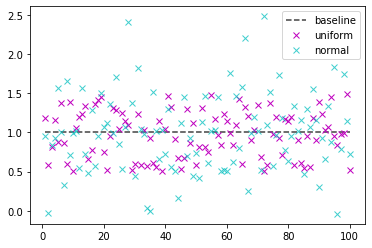

In [9]:
# Plotting random distribution vs normal distribution.
x = np.arange(0.0, 101, 1) # set range of x values for plotting

# horizontal lines
y = x/x # constant horizontal line against x - will be used as a baseline for showing random noise

plt.plot(x, y, 'k--', label='baseline', alpha=0.75) # baseline for uniform distribution noise

# random data points
noise_uniform = np.random.random(size=(len(x)))-0.5 # random (uniform) noise in on (0,1] and offset by0.5 in order to centralise about the base line, at y=1
noise_normal = np.random.normal(0.0, 0.5, len(x)) # normal distribution of noise

# Uniform distribution
plt.plot(x, y + noise_uniform, 'mx', label='uniform') # magneta x-es denote random noise value for each sample

# Normal distribution
plt.plot(x, y + noise_normal, 'cx', label='normal', alpha=0.75) # cyan x-es denote normal noise value for each sample

plt.legend()

### Funtion random.randint  

This method generates integer number(s) in a given range. The provided range is again half-open (left-sided inclusive, right-sided exclusive). The size parameter tells NumPy how many observations are to be generated, and can be organised in a multi-dimensional array.

In [10]:
np.random.randint(1,11, size=5) # 5 random integers in range between 1 and 10 inclusive

array([ 8, 10,  9,  5,  7])

### Function random.choice  
 
In the second category of subroutines of _simple random data_, picks items from a pre-defined set of the objects. 
 
The `random.choice` method returns objects, which does not necessarily have to be numbers, from an existing list or array. It is possible for the objects to be selected more than once.

In [11]:
list_1 = ["dog", "cat", "snake", "rat", "crow"] # predefinition of list of objects

np.random.choice(list_1[:2], size=[4,1]) # random selection of objects from the list and indices 0 or 1, arranged into 4x1 array; some results may not appear or may appear more than once

array([['cat'],
       ['dog'],
       ['dog'],
       ['cat']], dtype='<U3')

It is also possible to assign a probability for each option:

In [12]:
np.random.choice(list_1, p=[0.1, 0.1, 0.1, 0.1, 0.6], size=6)

array(['crow', 'crow', 'crow', 'crow', 'crow', 'crow'], dtype='<U5')

### Function random.bytes  

Returns string of random characters as bytes literals (prefixed with `b` notation). Some of the characters are encoded with `\x` notation, meaning hexidecimal address of the character in the ASCII table. Here is an extract from Python [documentation](https://docs.python.org/3/reference/lexical_analysis.html#string-and-bytes-literals):
> Bytes literals are always prefixed with 'b' or 'B'; they produce an instance of the bytes type instead of the str type. They may only contain ASCII characters; bytes with a numeric value of 128 or greater must be expressed with escapes.

This method may be used for a password generator (although it is still a pseudo random value).

The parameter passed to the method is the length of the returned string. For example:

In [13]:
np.random.bytes(1) # generate a random 1-long string of byte literals 

b'\xeb'

___
## Permutations

This group of methods in NumPy and allow to randomly reorder the objects in the set or in sub-set (range). It consists of two subroutines: `shuffle` and `permutation`.

### Function random.shuffle  

`np.random.shuffle` method randomly reorders the items of the entire set _in place_, that is original order is overwritten with the new sequence.

In [14]:
list = [1,2,3,4,5]
print(list) # in original order
np.random.shuffle(list)
list # in new order, overwriting the original

[1, 2, 3, 4, 5]


[4, 2, 1, 3, 5]

### Function random.permutation
`np.random.permutation` method returns a new array (copy of the original) of the objects from a list, randomly ordered. The output will contain all the objects from the original array, and will appear precisely in the same quantities as in the orignal set.

In [15]:
list_2 = [1,2,3,4,5] # list of objects
np.random.permutation(list_2) # the original list remains intact

array([2, 1, 5, 3, 4])

It is worth noting that `np.random.permutation` is built up on `np.random.shuffle` subroutine, which is used in the former source code. Extra functionality is provided on condition an array is parsed. Other wise, when an integer is parsed, it behaves as ordinary `shuffle` function.

___
## Selected distributions

NumPy comes with a selection of built-in probability density distributions, which are used to sample random data in a specific pattern from statistical science.
In NumPy v1.17.2, there are thirty-five different distributions available. Below we will discuss five of them, namely: uniform, standard_normal, binomial, exponential, weibull.

### 1. Uniform distribution  

`numpy.random.uniform` function generates random floating point number(s). Each random value returned from this method is equally probable to occur. The generated numbers are from half-open range - ends defined when the function is called. If the range is not defined, by default it is assumed to be [0,1), in which case the subroutine behaves the same as np.random.random one.

In [16]:
np.random.uniform(size=3)

array([0.93884533, 0.45282487, 0.62763995])

In [17]:
np.mean(np.random.uniform(0.9,1, size=10) * 10)

9.612476828524107

This distribution can be graphically interpreted as a 2-dimensional plane divided into equal areas. For instance, for 1000 random numbers generated (x-axis) in range [1-1000) (y-axis). Each sub-range on y-axis, e.g. 1-200, 201-400, etc, would receive the same amount of hits with equal probability. 

In the below plot, the likelihood of number of dots in each grid is equal, which becomes even more clear for larger number of samples generated.

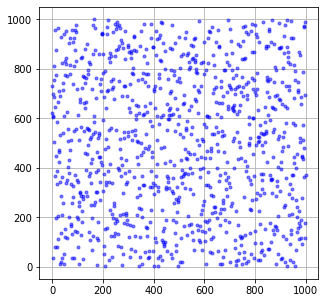

In [18]:
plt.figure(figsize=(5,5)) # size of the plot (width, height)
plt.plot(np.random.uniform(1,1000, size=1000), 'b.', alpha=0.5)
plt.grid()

The uniform distribution shows a property to fill out histograms bins uniformly, which becomes clearer for increasing number of samples. In other words, the more samples, the more equally filled is each bin on the histogram.

<function matplotlib.pyplot.show(*args, **kw)>

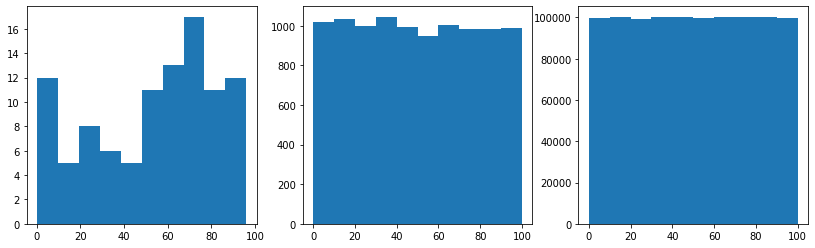

In [19]:
plt.figure(figsize=(14,4))

plt.subplot(1, 3, 1)
plt.hist(np.random.uniform(0,100, size=10**2)) # 100 samples

plt.subplot(1, 3, 2)
plt.hist(np.random.uniform(0,100, size=10**4)) # 10000 samples

plt.subplot(1, 3, 3)
plt.hist(np.random.uniform(0,100, size=10**6)) # 1000000 samples

plt.show # this command will hide away numeral values of the output - for clarity

### 2. Standard normal distribution

This distribution is a special case of a normal ditribution. `numpy.random.standard_normal` has its own subroutine under NumPy. It draws a standard normal (Gaussian) distribution for mean=0 and deviation=1 (another NumPy distribution, `np.random.normal`, allows to change these parameters).

Normal distribution shows a strong tendency to take values close to the center of the distribution and a sharp decrease in the number of deviations as they increase. There are great many examples where this distribution closely fits the observations in nature, e.g. the height of people - most of them have height close to the mean, with fewer and fewer people much shorter or taller. Extreme values are possible, but of low probability.

The more samples, the more "ideal" shape of the distribution takes.

Actual minimum:  -3.7040595875839633
Actual maximum:  2.753273734298619
Actual mean:  -0.04082315857872602
Actual standard diviation:  1.005696040070012


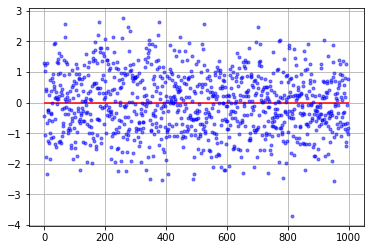

In [20]:
std_normal = np.random.standard_normal(size=1000) # standard normal distribution generation for n=1000 samples

plt.hlines(0,0,1000, colors='r') # baseline 
plt.grid()
plt.plot(std_normal, 'b.', alpha=.5)

# for reference, actual distribution parameters from the generated set
print("Actual minimum: ", np.min(std_normal))
print("Actual maximum: ", np.max(std_normal))
print("Actual mean: ", np.mean(std_normal))
print("Actual standard diviation: ", np.std(std_normal))

<function matplotlib.pyplot.show(*args, **kw)>

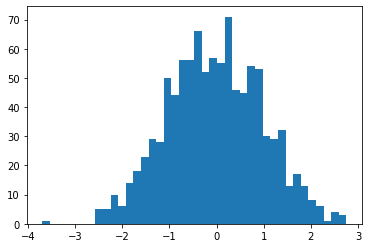

In [21]:
plt.hist(std_normal, bins=40)
plt.show # this command will hide away numeral values of the output - for clarity

For comparison, in the below plot, the same histogram is overlayed with the normal probability density function (pdf). In order the histogram to fit, it must be re-scaled so that the y-axis correspondes to the probability of occurance rather than counter of occurances. This re-scaling is called normalisation, so that the total area of the histogram is 1.

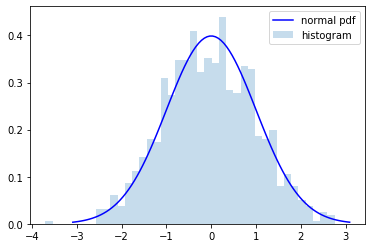

In [22]:
# Adopted from https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.norm.html

# Importing additional function `norm` from `scipy.stats` library
from scipy.stats import norm

fig, ax = plt.subplots(1, 1) # two plots on single figure

# defining limits for the normal distribution
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)  # generates 100 data points in range where the probabilityof occurance is 0.998 (between 0.001 and 0.999)
# normal distribution (probability density function pdf)
ax.plot(x, norm.pdf(x), 'b', label='normal pdf') 

#And compare the histogram:
ax.hist(std_normal, bins=40, density=True, alpha=0.25, label='histogram') # parameter 'density' toggled on makes the area of the histogram be normalised to 1 

ax.legend()
plt.show()

### 3. Binomial distribution

`np.random.binomial` samples from binomial distribution, where the results are two-folds, often represented as a _success_ or a _failure_. This distribution gives number of successful trials of `n`-total number of trials. Each result has a predefined `p`-probability of success.
For a large number of repetition (represented in NumPy by parameter _size_), and equal probability of winning (p=0.5), the result resembles a normal distribution.

In [23]:
np.random.binomial(1,0.5, size=10) # for 10 attempts, what is the result of the test, 1 - success, 0 - failure

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

Actual mean:  5.0283
Actual standard diviation:  1.59251345677203


<function matplotlib.pyplot.show(*args, **kw)>

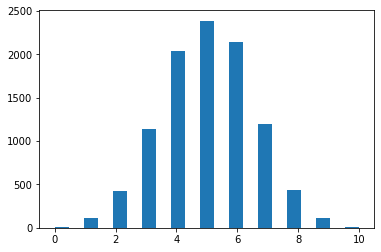

In [24]:
a = np.random.binomial(10,0.5, size=10000) # how many success will be in n=10 trials of tossing a 'fair' coin (p=0.5), test repetead 10000 times
print("Actual mean: ", np.mean(a))
print("Actual standard diviation: ", np.std(a))
plt.hist(a, bins=21) # density of successes in 10-trials binomial tests repeated 10000 times
plt.show

### 4. Exponential distribution

`numpy.random.exponential` function draws results from exponential distribution.

This type of distribution is typically used to describe situations where an object with a constant probability can change its state from one to another in a given unit of time. In other words, if independent events are to occur per unit of time, the exponential distribution describes the time intervals between successive events. There is many application of the distriution in the real situations, for instance the probability of a customer entering a shop store.

The NumPy function takes two parameters, the first one being the _scale_, which relates to the time period, and the other one - _size_, which is a number of experiments (by default, _size_ = 10).

Exponential distribution is a special case of gamma distribution, and is related to Poisson distribution (which is used to describe low-probability events, e.g. a number of accidents per person).

Below is an example of the distribution and the graphical interpretation.

<function matplotlib.pyplot.show(*args, **kw)>

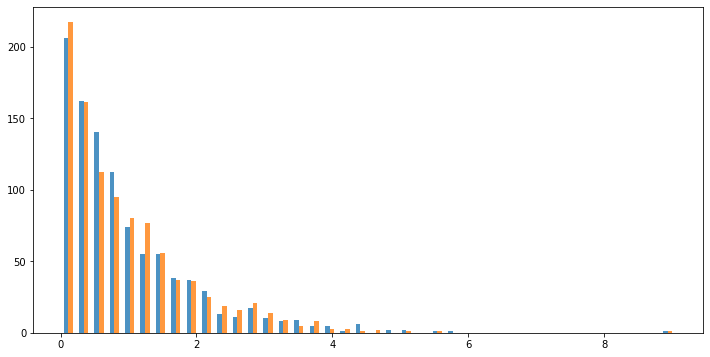

In [25]:
plt.figure(figsize=(12,6)) # size of the plot (width, height)
expon = np.random.exponential(1, [1000,2]) # the first parameter (scale) relates to time period, the second one (size) - to number of experiments (2 sets of 1000 experiments)

plt.hist(expon, bins=40, alpha=0.8, rwidth=0.6) # the values in bins are grouped by sets of experiment, each in represented by different colour

plt.show

Similarly to normal distribution in section 2. above, in the below plot, the same histogram is overlayed with the normal probability density function (pdf), for comparison. Again, for the histogram to fit, it must be re-scaled so that the y-axis correspondes to the probability of occurance rather than counter of occurances.

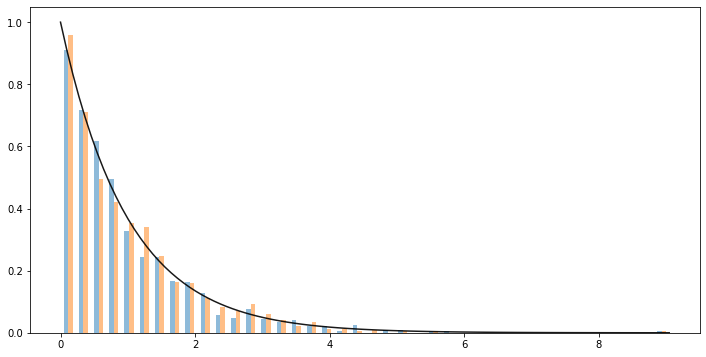

In [26]:
# adapted from https://stackoverflow.com/a/47324702

# exponential funtion
def dist_func(x, a):
    return(a*np.exp(-a*x))

fig = plt.figure(figsize=(12, 6)) # size of the plot (width, height)
ax = fig.add_subplot(1, 1, 1 )

# histogram takes data from the value generated in the above Notebook cell
ax.hist(expon, bins=40, alpha=0.5, rwidth=0.6, density=True) # the same format as above

# ideal exponential pdf curve, for comparison
max_e = np.max(expon) # the largest of the generated values
ax.plot(np.linspace(0, max_e, 100), dist_func(np.linspace(0, max_e, 100), 1), 'k', alpha=0.9) # 
plt.show()

### 5. Weibull distribution

`numpy.random.weibull` subroutine produces results from weilbull distribution. This probability distribution found a numerous applications in technical science. For instance, it is often used in equipment reliability study, e.g. to evaluate mean time between failures (MTBF) - maintenance and reliability related concepts were discussed in the [paper](http://system.logistics-and-transport.eu/index.php/main/article/view/509) I published. 


The function takes two parameters: shape and size.

The _shape_ parameter is a positive float number must be greater than one. 
Its value will dictate the  the slope of the regressed line in probability plot' (Realiawiki), corresponding to certain conditions being simulated. For shape > 1 the probability density distribution resembles normal 
distribution, but skewed; for shape < 1 it resembles exponential distribution.

For example, below is a plot showing the _shape_ value .5, 1.0, 1.5 and 3.0.

/home/ak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  
/home/ak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


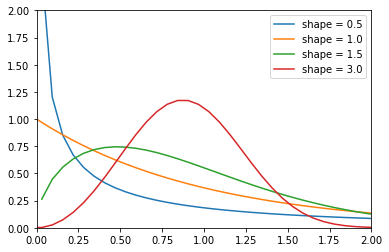

In [27]:
# adopted from NumPy documentation, https://docs.scipy.org/doc/numpy-1.16.0/reference/generated/numpy.random.weibull.html#numpy.random.weibull

x_range = np.arange(0, 2, 0.01) # range of x-axis (start, stop, step)

def weib_pdf(x_range, a): # a - shape of the weibull distribution, adapted from https://numpy.org/doc/1.17/reference/random/generated/numpy.random.Generator.weibull.html
    return (a / 1) * (x / 1)**(a - 1) * np.exp(-(x / 1)**a) # scale=1

plt.plot(x, weib_pdf(x, 0.5), label='shape = 0.5')
plt.plot(x, weib_pdf(x, 1.0), label='shape = 1.0')
plt.plot(x, weib_pdf(x, 1.5), label='shape = 1.5')
plt.plot(x, weib_pdf(x, 3.0), label='shape = 3.0')

plt.xlim(0, 2)
plt.ylim(0, 2)

plt.legend()
plt.show()

The _size_ parameter represents the how large is the experiment. Below plot illustrate the Weibull density distribution for two sets of experiments, of 500 observations each, discriminated in the plots by colour.

<function matplotlib.pyplot.show(*args, **kw)>

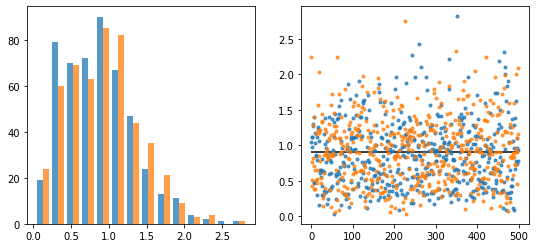

In [28]:
weib = np.random.weibull(2, [500,2]) # the first parameter (shape), the second one (size) - to number of experiments (2 sets of 500 experiments)

plt.figure(figsize=(9,4)) # size of the plot (width, height)

plt.subplot(1, 2, 1)
plt.hist(weib, bins=14, alpha=0.75) # results of the two sets of experiments are represented by differnt colours

plt.subplot(1, 2, 2)
plt.plot(weib, '.', alpha=0.75)
plt.hlines((np.mean(weib)),0,500, colors='k') # draws a horizontal line at mean-value for comparison purpose

plt.show

___
## Seed

#### The concept of Pseudo Randomness 

Randomness is an interesting question in computer science in general, and posses some technical challenges (source: [Quora](https://www.quora.com/Why-is-it-so-hard-to-generate-actually-random-numbers)). 

In practice, the uncertainty is simulated by application of algorithms. The resulting numbers are obtained in deterministic way. For k various inputs there may be only k possible outputs. There is also a finite amount of computer memory, limiting the calculations. The generated results are not truly random, and so are called pseudo-random. The technique of acquiring a number via such algorithms is referred as to _Pseudo Random Number Generator_ (PRNG). Of course, much effort is put into ensuring the generated results appear satisfactorily random. The algorithms are complex and for most of typical applications, excluding security and cryptography (not discussed here), the simulated randomness is sufficient. 

Python (and NumPy) uses PRNG the Mersenne Twister algorithm. Below is a short exert from OverStack on the algorithm (source: [Stack Overflow](https://stackoverflow.com/a/7030595)). 

>  [Python and NumPy] both use the Mersenne twister sequence to generate their random numbers, and they're both completely deterministic - that is, if you know a few key bits of information, it's possible to predict with absolute certainty what number will come next. For this reason, neither numpy.random nor random.random is suitable for any serious cryptographic uses. But because the sequence is so very very long, both are fine for generating random numbers in cases where you aren't worried about people trying to reverse-engineer your data. This is also the reason for the necessity to seed the random value - if you start in the same place each time, you'll always get the same sequence of random numbers!


#### Seed

The above quote gives and insight into the concept of _seed_. It is, essentially, a numeric input, on which the algorithm produces the pseudo-random output. The seed  defines the initial conditions for the generator. If the initial conditions are the same, the result will also be the same. The PRNG, naturally, modifies the value of the seed used on continuous basis. The randomness, often referred as to entropy, is simulated by inputs from the outside, an element of chaos in the natural world. There are various sources of the inputs form the hardware, like mouse movements or the noise generated by a fan [Wikipedia](https://en.wikipedia.org/wiki/Entropy_(computing)).
Often, the seed is taken from the system clock. The system clock in Unix-based systems is stored in the form of seconds passed from 1st January 1970. As the passing time is monitored with a high precision (CPU dependent), every time the pseudo-random number that is generated may appear different and random.  

#### System clock

The current time in seconds passed from 1st January 1970 can be obtained with `time()` method from Python `time` library.

In [29]:
import time;
time.time()

1573403662.5701017

In [30]:
np.random.random()

0.1593241040958927

#### Seed reuse

Furthermore, as per another [Stack Overflow response](https://stackoverflow.com/a/32172816), it is possible to retrieve the _seed_ used with the help of `numpy.random.get_state` method, and hence reproduces the same result. 

User can pass a value of _seed_ to the random function to control the generated data, for example in order to produce identical output. 

In [31]:
# set seed number
np.random.seed(1) # seed = 1
# generate pseudo-random numbers
for i in range(4):
    print(np.random.random(), end=" ")
print("\n") # new line

# use the same seed value again to get the same output
np.random.seed(1)
# generate pseudo-random numbers
for i in range(4):
    print(np.random.random(), end=" ")

0.417022004702574 0.7203244934421581 0.00011437481734488664 0.30233257263183977 

0.417022004702574 0.7203244934421581 0.00011437481734488664 0.30233257263183977 

___
## References

### General Python

- [GMIT _Programming for Data Analysis_ module materials](https://learnonline.gmit.ie/course/view.php?id=1127)
- [Python 3 official tutorial](https://docs.python.org/3/tutorial/)

### General NumPy

- [NumPy official documentation](https://docs.scipy.org/)
- [NumPy on repository on GitHub](https://github.com/numpy/numpy)

### Random sampling in NumPy

- [NumPy v1.17 - Random sampling](https://docs.scipy.org/doc/numpy/reference/random/index.html)
- [NumPy v1.16 - Random sampling routines](https://numpy.org/doc/1.16/reference/routines.random.html)
- [Geeksforeeks - Random sampling in numpy](https://www.geeksforgeeks.org/random-sampling-in-numpy-random_sample-function/)
- [Medium - Incredibly Fast Random Sampling in Python](https://medium.com/ibm-watson/incredibly-fast-random-sampling-in-python-baf154bd836a)
- [Tutorialspoint - Generate pseudo-random numbers in Python](https://www.tutorialspoint.com/generate-pseudo-random-numbers-in-python)
- [Quora - Why is it so hard to generate actually random numbers?](https://www.quora.com/Why-is-it-so-hard-to-generate-actually-random-numbers)
- [Wikipedia - Random numbers generation](https://en.wikipedia.org/wiki/Random_number_generation)
- [Stack Overflow - Differences between numpy.random and random.random in Python](https://stackoverflow.com/a/7030595)
- [NumPy documentation - Mersenne Twister](https://docs.scipy.org/doc/numpy/reference/random/bit_generators/mt19937.html)
- [Sharp Sight - NumPy Random Seed Explained](https://www.sharpsightlabs.com/blog/numpy-random-seed/)
- [Machine Learning Mastery - How to generate random numbers in Python](https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/)

### Statistics

- [DataCamp - Statistical thinking in Python course, part 2](https://www.datacamp.com/courses/statistical-thinking-in-python-part-2)
- [Quora - What is the difference between an exponential, gamma and poisson distribution?](https://www.quora.com/What-is-the-difference-between-an-exponential-gamma-and-poisson-distribution)
- [Realiawiki - The Weibull distribution](http://reliawiki.org/index.php/The_Weibull_Distribution)


### Others

- [Software Carpentery - Version Control with Git](http://swcarpentry.github.io/git-novice/)
- [Mastering Markdown](https://guides.github.com/features/mastering-markdown/)
- [Modern Machine Learning Algorithms: Strengths and Weaknesses](https://elitedatascience.com/machine-learning-algorithms)


___
Andrzej Kocielski